## U shape PHP dynamics with multiple liquid slugs - with heat transfer

## $\frac{\partial \theta }{\partial \mathcal{T}} = \nabla^2 \theta$

In [1]:
@time using Plots
pyplot()

 41.687862 seconds (19.66 M allocations: 1.104 GiB, 7.17% gc time)


Plots.PyPlotBackend()

In [2]:
@time using DifferentialEquations

110.674993 seconds (53.94 M allocations: 3.103 GiB, 2.77% gc time)


In [3]:
cd(dirname(pwd()))
cd("src") 


include("Systems.jl")
using ..Systems

include("Tools.jl")
using ..Tools


include("Thermomodel.jl")
using ..Thermomodel

include("Postprocessing.jl")
using ..Postprocessing

include("Boiling.jl")
using ..Boiling

cd(dirname(pwd()))
cd("src") 

## Parameters of the PHP

In [4]:
    ω0 = [sqrt(1.2e004)];
    ℘ = [1.2e005];

    θinitial=1.0
    θ  = 0.15;
    θe = 1 + θ;
    θc = 1 - θ;

    We = [10.0,20.0,10.0]
    
    He = 3000.0;
    Hc = 3000.0;
    Hₗ =  3000.0; # liquid wall heat transfer coeffcient

    
    X0 = 0.5;

    γ = 1.4;

In [5]:
    
    d = 1/30 # dimensionless diameter
    L = 8.0  # total length of the pipe when streched to a 1D pipe
    L2D = 2.0 # the actual length of the bended pipe in the real world
    angle = pi/2 # inclination angle 


1.5707963267948966

## Pipe definition

In [6]:
tube = Tube(d,L,L2D,angle)

Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966)

## Evaporator and condenser definition

In [7]:
Xe = map(tuple, [0.0; 3.0; 7.0], [1.0; 5.0; 8.0])
evap = Evaporator(He,θe,Xe,We)

Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)], [10.0, 20.0, 10.0])

In [8]:
Xc = map(tuple, [1.0; 5.0], [3.0; 7.0])
cond = Condenser(Hc,θc,Xc)

Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)])

## Vapor plug and liquid slug initialization

In [9]:
N=1000
X0 = [(0.5,2.5),(5.0,7.0)]
dXdt0 = [(0.0,0.0),(0.0,0.0)]
ρₗ = 1000
Xarrays,θarrays = constructXarrays(X0,N,θinitial,L)
liquids=Liquid(γ,Hₗ,ρₗ,ω0,℘,X0,dXdt0,Xarrays,θarrays)

Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056225, 5.040160642570281, 5.048192771084337, 5.056224899598393, 5.06425702811245, 5.072289156626506  …  6.927710843373494, 6.93574297188755, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.967871485943775, 6.975903614457831, 6.983935742971887, 6.991967871485944, 7.0]], [[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …

In [10]:
P = [1.0,1.0,1.0];
δ = 0.05*P;
vapors=Vapor(γ,P,δ)

Vapor(1.4, [1.0, 1.0, 1.0], [0.05, 0.05, 0.05])

In [11]:
α = 1 # nondimensional thermal diffusivity = (αₐ d^2) / (νₗ height^2)
Xwallarray,θwallarray = constructXarrays(L,N,θinitial)

wall = Wall(α,Xwallarray,θwallarray)

Wall(1.0, [0.0, 0.008008008008008008, 0.016016016016016016, 0.024024024024024024, 0.03203203203203203, 0.04004004004004004, 0.04804804804804805, 0.056056056056056056, 0.06406406406406406, 0.07207207207207207  …  7.927927927927928, 7.935935935935936, 7.943943943943944, 7.951951951951952, 7.95995995995996, 7.967967967967968, 7.975975975975976, 7.983983983983984, 7.991991991991992, 8.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [12]:
# struct Mapping
#     walltoliquid::Array{Tuple{Int64,Int64},1}
#     liquidtowall::Array{Array{Int64,1},1}
# end

In [13]:
walltoliquid, liquidtowall = constructmapping(Xarrays,Xwallarray)
mapping = Mapping(walltoliquid,liquidtowall)

Mapping([(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1)], [[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  305, 306, 307, 308, 309, 310, 311, 312, 313, 314], [626, 627, 628, 629, 630, 631, 632, 633, 634, 635  …  867, 868, 869, 870, 871, 872, 873, 874, 875, 876]])

## Construct the system

In [14]:
sys0 = PHPSystem(tube,evap,cond,liquids,vapors,wall,mapping)

PHPSystem(Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)], [10.0, 20.0, 10.0]), Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)]), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702812, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.4518072289156625, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.4839357429718874, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056225, 5.040160642570281, 5.048192771084337, 5.056224899598393, 5.06425702811245, 5.072289156626506  …  6.927710843373494, 6.93574297188755, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.967871485943775, 6.975903614457831, 6

In [15]:
typeof(sys0)

PHPSystem

## Construct U for wall heat function

## construct state vector U

In [16]:
vectoXMδ(XMδtovec(X0,dXdt0,M,δ))

LoadError: [91mUndefVarError: M not defined[39m

In [17]:
sys0.wall.θarray = settemperature!.(sys0.wall.θarray,sys0.wall.Xarray,[sys0]);

In [18]:
Lvaporplug = XptoLvaporplug(X0,sys0.tube.L)
M = P.^(1/γ).* Lvaporplug


u=[XMδtovec(X0,dXdt0,M,δ); wallθtovec(sys0.wall.θarray); liquidθtovec(sys0.liquid.θarrays)];

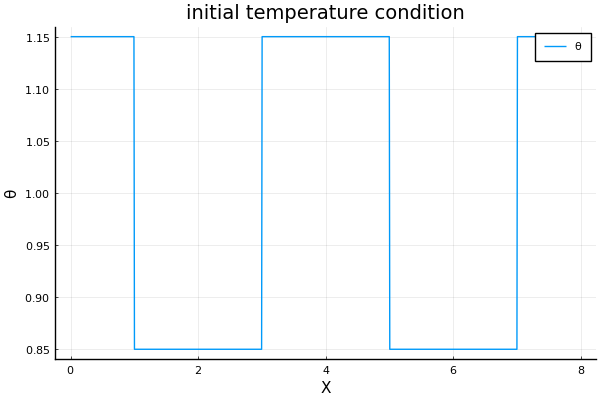

In [19]:
plot([sys0.wall.Xarray],[sys0.wall.θarray], title="initial temperature condition", labels = "θ", xlabel="X", ylabel="θ")

## Solve the constructed ODE for U

### propagation function

In [20]:
function dfdt(u,p,t)
    
        p = deepcopy(getcurrentsys(u,p))
    
        indexes = Int64[]
        θliquidtemp = Array[]

        for i = 1:length(u)
            if abs(u[i]+1e10) <= 10^(-1)
                push!(indexes,i)
            end
        end
    

    dynamicsdu = dynamicsmodel(u[1:indexes[1]-1],p)
    
    
    
    duwalltemp = wallmodel(u[indexes[1]+1:indexes[2]-1],p)
    walldu = duwallθtovec(duwalltemp)
    
    
    
    for i = 1:length(indexes)-2
    push!(θliquidtemp, u[indexes[i+1]+1:indexes[i+2]-1])
    end
    push!(θliquidtemp, u[indexes[end]+1:end])
    duliquidtemp = zero.(deepcopy(θliquidtemp))
    duliquidtemp = liquidmodel(θliquidtemp,p)
    liquiddu = duliquidθtovec(duliquidtemp)
    
    du = [dynamicsdu;walldu;liquiddu]

    return(du)

end

dfdt (generic function with 1 method)

### condition

In [21]:
# function condition(u,t,integrator)
#     return (integrator.t > 0.1)
# end

### affect! (with boundary conditions)

In [22]:
p

LoadError: [91mUndefVarError: p not defined[39m

In [23]:
function affect!(integrator)
    
    p = deepcopy(getcurrentsys(integrator.u,integrator.p))
    
    p = nucleateboiling(p,(1.2,1.4),1.0)
    
    Lvaporplug = XptoLvaporplug(p.liquid.Xp,p.tube.L)
    M = p.vapor.P.^(1/p.vapor.γ).* Lvaporplug
    
    unew=[XMδtovec(p.liquid.Xp,p.liquid.dXdt,M,p.vapor.δ); wallθtovec(p.wall.θarray); liquidθtovec(p.liquid.θarrays)];
        
#     set_u!(integrator,  unew)
    resize!(integrator.u,length(unew))
    integrator.u = deepcopy(unew)
    

end

affect! (generic function with 1 method)

In [24]:
cb =  PresetTimeCallback(0.1,affect!)

DiscreteCallback{DiffEqCallbacks.var"#61#64"{Float64},DiffEqCallbacks.var"#62#65"{typeof(affect!)},DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)},typeof(DiffEqBase.FINALIZE_DEFAULT)}(DiffEqCallbacks.var"#61#64"{Float64}(0.1), DiffEqCallbacks.var"#62#65"{typeof(affect!)}(affect!), DiffEqCallbacks.var"#63#66"{typeof(DiffEqBase.INITIALIZE_DEFAULT),Bool,Float64,typeof(affect!)}(DiffEqBase.INITIALIZE_DEFAULT, true, 0.1, affect!), DiffEqBase.FINALIZE_DEFAULT, Bool[1, 1])

In [25]:
tstep=4e-5

p = sys0
tspan = (0.0, 0.2);
prob = ODEProblem(dfdt, u, tspan, p)

integrator = init(prob, RK4(), adaptive=false, dt=tstep);


# sol = solve(prob, RK4(), adaptive=false, dt=tstep);
sol = solve(prob, RK4(), adaptive=false,dt=tstep,callback=cb);

In [26]:
sol[end]

1524-element Array{Float64,1}:
  0.6022926684058075
  1.2898447191243454
  1.3541865835247635
  2.6666345328062406
  4.953079480348319
  6.953079480348319
  0.4724651088878505
  0.4724651088878505
 -0.3113169283168327
 -0.3113169283168327
 -0.19374290276065617
 -0.19374290276065617
  0.6179937965793046
  ⋮
  1.0018980933346642
  1.0027633969085143
  1.0036313920655098
  1.0045020077827334
  1.0053751790683523
  1.0062508474625045
  1.0071289615326977
  1.008009477355671
  1.00889235897854
  1.009777578853822
  1.0106651182456365
  1.01155496760805

In [27]:
constructmapping(Xarrays,Xwallarray)

([(1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1), (1, -1)  …  (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1), (3, -1)], [[64, 65, 66, 67, 68, 69, 70, 71, 72, 73  …  305, 306, 307, 308, 309, 310, 311, 312, 313, 314], [626, 627, 628, 629, 630, 631, 632, 633, 634, 635  …  867, 868, 869, 870, 871, 872, 873, 874, 875, 876]])

In [28]:
sysfinal = getcurrentsys.(sol.u,[sys0])

5003-element Array{PHPSystem,1}:
 PHPSystem(Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)], [10.0, 20.0, 10.0]), Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)]), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.5, 2.5), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0)], [[0.5, 0.5080321285140562, 0.5160642570281124, 0.5240963855421686, 0.5321285140562249, 0.5401606425702811, 0.5481927710843374, 0.5562248995983936, 0.5642570281124498, 0.572289156626506  …  2.427710843373494, 2.4357429718875503, 2.4437751004016066, 2.451807228915663, 2.459839357429719, 2.467871485943775, 2.4759036144578315, 2.483935742971888, 2.4919678714859437, 2.5], [5.0, 5.008032128514056, 5.016064257028113, 5.024096385542169, 5.032128514056224, 5.040160642570281, 5.048192771084338, 5.056224899598393, 5.06425702811245, 5.072289156626505  …  6.927710843373495, 6.935742971887551, 6.943775100401607, 6.951807228915663, 6.959839357429719, 6.9678

In [29]:
sysfinal[end].liquid.Xarrays

3-element Array{Array{Float64,1},1}:
 [0.6022926684058075, 0.6117111896485272, 0.6211297108912469, 0.6305482321339667, 0.6399667533766863, 0.649385274619406, 0.6588037958621257, 0.6682223171048455, 0.6776408383475652, 0.6870593595902847  …  1.205078027939868, 1.2144965491825879, 1.2239150704253074, 1.2333335916680273, 1.2427521129107468, 1.2521706341534666, 1.2615891553961862, 1.271007676638906, 1.2804261978816256, 1.2898447191243454]
 [1.3541865835247635, 1.3616862860920864, 1.369185988659409, 1.3766856912267316, 1.3841853937940543, 1.3916850963613772, 1.3991847989287, 1.4066845014960225, 1.4141842040633452, 1.4216839066306681  …  2.599137209700336, 2.6066369122676587, 2.6141366148349814, 2.6216363174023045, 2.6291360199696268, 2.6366357225369494, 2.6441354251042726, 2.6516351276715953, 2.659134830238918, 2.6666345328062406]
 [4.953079480348319, 4.9611116088623755, 4.969143737376432, 4.977175865890487, 4.985207994404544, 4.9932401229186, 5.001272251432657, 5.0093043799467125, 5.017336

In [30]:
result1=soltoMatrxResult(sol,sys0);

In [31]:
@gif for i=1:size(sol,2)
plot([x],[sol[i][13:1012]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along the wall"), ylim=(0.85,1.15))
    vline!([0,1,3,5,7,8], color = [:red])
    end every 50

LoadError: [91mUndefVarError: x not defined[39m

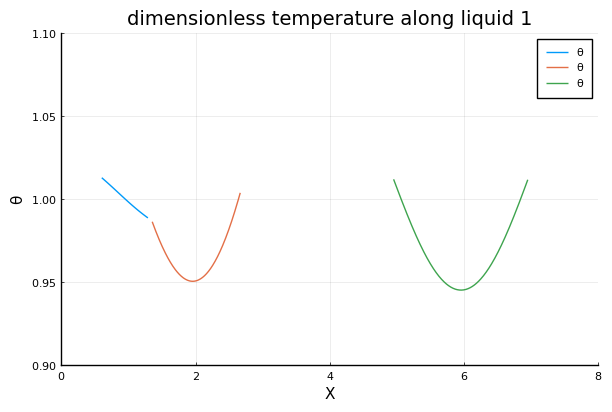

┌ Info: Saved animation to 
│   fn = C:\Users\liyux\github\OneDThermalFlow\src\tmp.gif
└ @ Plots C:\Users\liyux\.julia\packages\Plots\kyYZF\src\animation.jl:104


Plots.AnimatedGif("C:\\Users\\liyux\\github\\OneDThermalFlow\\src\\tmp.gif")
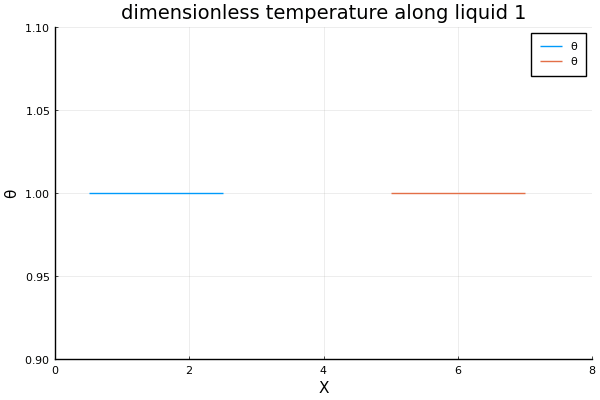

In [32]:
@gif for i=1:size(sol,2)
plot([sysfinal[i].liquid.Xarrays[1]],[sysfinal[i].liquid.θarrays[1]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
plot!([sysfinal[i].liquid.Xarrays[2]],[sysfinal[i].liquid.θarrays[2]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
    if i >2502
        plot!([sysfinal[i].liquid.Xarrays[3]],[sysfinal[i].liquid.θarrays[3]], labels = "θ", xlabel="X", ylabel="θ", title=("dimensionless temperature along liquid 1"),xlim=(0,8), ylim=(0.9,1.1))
    end
    end every 50

In [33]:
# MatrxXp, MatrxdXdt, MatrxM, Matrxδ=soltoMatrxResult(sol[1:2502],sys0);

# ΔMatrxXp = zeros(size(MatrxXp,1)+1,size(MatrxXp,2))
# ΔMatrxXp[1,:] = MatrxXp[1,:]
# ΔMatrxXp[end,:] .= sys0.tube.L .- MatrxXp[end,:]
# for i = 2:size(MatrxXp,1)
#     ΔMatrxXp[i,:] = MatrxXp[i,:]-MatrxXp[i-1,:]
# end

# MatrxXp

In [34]:
MatrxXp1, MatrxdXdt1, MatrxM1, Matrxδ1=soltoMatrxResult(sol[1:2502],sys0);

ΔMatrxXp1 = zeros(size(MatrxXp1,1)+1,size(MatrxXp1,2))
ΔMatrxXp1[1,:] = MatrxXp1[1,:]
ΔMatrxXp1[end,:] .= sys0.tube.L .- MatrxXp1[end,:]
for i = 2:size(MatrxXp1,1)
    ΔMatrxXp1[i,:] = MatrxXp1[i,:]-MatrxXp1[i-1,:]
end

ΔMatrxXp1

5×2502 Array{Float64,2}:
 0.5  0.500005  0.500019  0.500043  0.500077  …  0.612406  0.612448  0.612448
 2.0  2.0       2.0       2.0       2.0          2.0       2.0       2.0
 2.5  2.5       2.49998   2.49996   2.49992      2.33897   2.3389    2.3389
 2.0  2.0       2.0       2.0       2.0          2.0       2.0       2.0
 1.0  1.0       1.0       1.0       1.0          1.04862   1.04865   1.04865

In [35]:
MatrxXp2, MatrxdXdt2, MatrxM2, Matrxδ2=soltoMatrxResult(sol[2503:end],sys0);

ΔMatrxXp2 = zeros(size(MatrxXp2,1)+1,size(MatrxXp2,2))
ΔMatrxXp2[1,:] = MatrxXp2[1,:]
ΔMatrxXp2[end,:] .= sys0.tube.L .- MatrxXp2[end,:]
for i = 2:size(MatrxXp2,1)
    ΔMatrxXp2[i,:] = MatrxXp2[i,:]-MatrxXp2[i-1,:]
end

ΔMatrxXp2

7×2501 Array{Float64,2}:
 0.512448  0.512526  0.512675  0.512895  …  0.602251   0.602273   0.602293
 0.687552  0.687552  0.687552  0.687552     0.687552   0.687552   0.687552
 0.2       0.199949  0.199796  0.199542     0.0644059  0.0643735  0.0643419
 1.31245   1.31245   1.31245   1.31245      1.31245    1.31245    1.31245
 2.2389    2.23884   2.23883   2.23887      2.28643    2.28644    2.28644
 2.0       2.0       2.0       2.0       …  2.0        2.0        2.0
 1.04865   1.04868   1.0487    1.0487       1.04691    1.04691    1.04692

In [36]:
MatrxXp1

4×2502 Array{Float64,2}:
 0.5  0.500005  0.500019  0.500043  0.500077  …  0.612406  0.612448  0.612448
 2.5  2.5       2.50002   2.50004   2.50008      2.61241   2.61245   2.61245
 5.0  5.0       5.0       5.0       5.0          4.95138   4.95135   4.95135
 7.0  7.0       7.0       7.0       7.0          6.95138   6.95135   6.95135

In [37]:
MatrxXp2

6×2501 Array{Float64,2}:
 0.512448  0.512526  0.512675  0.512895  …  0.602251  0.602273  0.602293
 1.2       1.20008   1.20023   1.20045      1.2898    1.28982   1.28984
 1.4       1.40003   1.40002   1.39999      1.35421   1.3542    1.35419
 2.71245   2.71247   2.71247   2.71244      2.66666   2.66665   2.66663
 4.95135   4.95132   4.9513    4.9513       4.95309   4.95309   4.95308
 6.95135   6.95132   6.9513    6.9513    …  6.95309   6.95309   6.95308

In [38]:
length(sol.t[2503:end])

2501

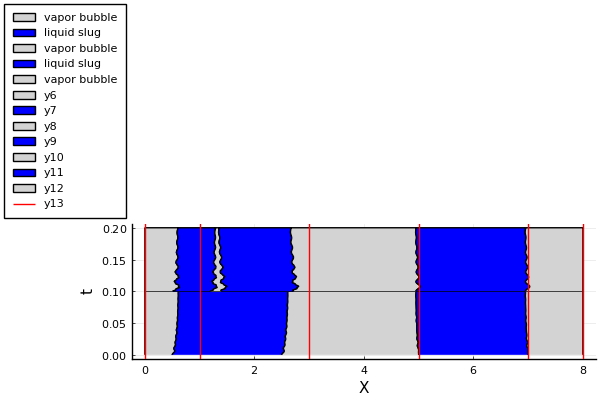

┌ Warning: Indices Base.OneTo(1) of attribute `seriescolor` does not match data indices 1:17.
└ @ Plots C:\Users\liyux\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Info: Data contains NaNs or missing values, and indices of `seriescolor` vector do not match data indices.
│ If you intend elements of `seriescolor` to apply to individual NaN-separated segements in the data,
│ pass each segment in a separate vector instead, and use a row vector for `seriescolor`. Legend entries 
│ may be suppressed by passing an empty label.
│ For example,
│     plot([1:2,1:3], [[4,5],[3,4,5]], label=["y" ""], seriescolor=[1 2])
└ @ Plots C:\Users\liyux\.julia\packages\Plots\kyYZF\src\utils.jl:104
┌ Warning: Indices Base.OneTo(1) of attribute `linecolor` does not match data indices 1:17.
└ @ Plots C:\Users\liyux\.julia\packages\Plots\kyYZF\src\utils.jl:102
┌ Info: Data contains NaNs or missing values, and indices of `linecolor` vector do not match data indices.
│ If you intend elements of `linecolor` to a

In [39]:
portfoliocomposition(ΔMatrxXp1', sol.t[1:2502], legend = :outertopleft, color = [:lightgrey :blue],ylabel="t", xlabel="X", labels = ["vapor bubble" "liquid slug"])
portfoliocomposition!(ΔMatrxXp2',sol.t[2503:end], color = [:lightgrey :blue])
vline!([0,1,3,5,7,8], color = [:red])

In [40]:
# portfoliocomposition(MatrxM', sol.t, legend = :outertopleft, labels = ("mass of vapor bubble"), ylabel="t", xlabel="mass")

In [41]:
# result1 = soltoResult(sol[1:11,:],sys0)
# plot(sol.t, result1.θ[1], title="temperatures for three vapor bubbles")
# plot!(sol.t, result1.θ[2])
# plot!(sol.t, result1.θ[3])

In [42]:
Xpvapornew = (1.5,1.6)
Pvapornew = 1.1

1.1

In [43]:
sysnew = nucleateboiling(sys0,Xpvapornew,Pvapornew)

PHPSystem(Tube(0.03333333333333333, 8.0, 2.0, 1.5707963267948966), Evaporator(3000.0, 1.15, [(0.0, 1.0), (3.0, 5.0), (7.0, 8.0)], [10.0, 20.0, 10.0]), Condenser(3000.0, 0.85, [(1.0, 3.0), (5.0, 7.0)]), Liquid(1.4, 3000.0, 1000.0, [109.54451150103323], [120000.0], [(0.44999999999999996, 1.5), (1.6, 2.55), (5.0, 7.0)], [(0.0, 0.0), (0.0, 0.0), (0.0, 0.0)], [[0.44999999999999996, 0.45846774193548384, 0.46693548387096767, 0.47540322580645156, 0.48387096774193544, 0.49233870967741933, 0.5008064516129032, 0.5092741935483871, 0.5177419354838709, 0.5262096774193548  …  1.4237903225806452, 1.432258064516129, 1.440725806451613, 1.4491935483870968, 1.4576612903225805, 1.4661290322580645, 1.4745967741935486, 1.4830645161290323, 1.491532258064516, 1.5], [1.6, 1.6076612903225806, 1.6153225806451612, 1.6229838709677422, 1.6306451612903228, 1.6383064516129033, 1.645967741935484, 1.6536290322580647, 1.6612903225806455, 1.6689516129032258  …  2.481048387096774, 2.488709677419355, 2.4963709677419352, 2.5

In [44]:
xtest = 1.5

1.5

In [45]:
ifamong(xtest,sys0.evaporator.Xe)

false